In [1]:
import import_ipynb
import import_librares
from import_librares import pd, plt
import func 
from ipynb.fs.full.func import tokenize_morphy, tokenize_lancaster, tokenize_snowball

importing Jupyter notebook from import_librares.ipynb


c:\course_work\feature_extraction_NLP\.conda\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


importing Jupyter notebook from func.ipynb


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NitghtWay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NitghtWay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NitghtWay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NitghtWay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
#Загрузка русского датасета и объедниение 
train_path = 'C:\\course_work\\feature_extraction_NLP\\data\\test_ds1\\train.jsonl'
val_path = 'C:\\course_work\\feature_extraction_NLP\\data\\test_ds1\\val.jsonl'
train_data = pd.read_json(train_path, lines=True)
val_data = pd.read_json(val_path, lines=True)
df = pd.concat([train_data, val_data])
df = df.drop(['label', 'hypothesis', 'verb','negation'
,'idx','no_negation'], axis=1)
df.dropna()
df.head()


,premise,genre
0,Сумма ущерба составила одну тысячу рублей. Уто...,kp
1,"Перебрасываясь словечками, они скользят глазам...",fiction
2,"— Разве что, — сказала она, — мы хотим где-ниб...",fiction
3,"Зима, наконец, показала свой характер.",kp
4,Гуманность Бога подобным сценарием не предпола...,fiction


In [3]:
#Объединение двух похожих классов
df['genre'] = df['genre'].replace('kp', 'interfax')

<Axes: xlabel='genre'>

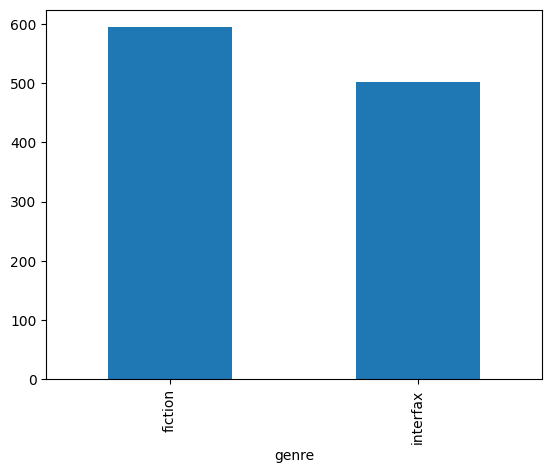

In [4]:
#Проверка на сбалансированность
pivot_table = df.groupby('genre').size()
pivot_table.plot(kind='bar')
#plt.show()

In [5]:
Y = pd.DataFrame({'genre':[str(genre) for genre in df['genre']]})
#Формирование наборов данных
df_morphy = pd.DataFrame({'text':[tokenize_morphy(sample) 
for sample in df['premise']]})
df_snowball = pd.DataFrame({'text':[tokenize_snowball(sample) 
for sample in df['premise']]})
df_lancaster = pd.DataFrame({'text':[tokenize_lancaster(sample) 
for sample in df['premise']]})
#Очистка от пустот
X1 = df_lancaster.dropna()
X2 = df_morphy.dropna()
X3 = df_snowball.dropna()
#формирование данных в виде "текст - класс"
batch1 = X1.join(Y, how = 'right')
batch2 = X2.join(Y, how = 'right')
batch3 = X3.join(Y, how = 'right')